In [1]:
import math,csv, random, collections
import numpy as np
import pickle
import seaborn as sns
import matplotlib.patches as mpatches
import random, string
import matplotlib as mpl
import imp, sys
sys.path.insert(0, '../')
import utils, algorithms
import h5py, imp

import matplotlib.pyplot as plt
from IPython.display import display, HTML
from multiprocessing import Pool
from multiprocessing import Process, Queue
imp.reload(utils)
imp.reload(algorithms)
        
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

sns.set_style('white')
color_p = sns.color_palette()

In [2]:
n = 2500
it_limit = np.sqrt(4*np.log(n))
mg_limit = np.sqrt(6*np.log(n))
sg_limit = np.sqrt(8*np.log(n))
filenameBP = 'data/BP_'+str(n)+'.csv'   
filenameLP = 'data/LP_'+str(n)+'.csv'

f = open(filenameBP, 'rb')
readerBP = csv.reader(f)
resultsBP  = []
for row in readerBP:
    if len(row)!=n*10+2:
        print len(row), i, row[:2]
        continue
    resultsBP  += [np.array(row, dtype='float')]
resultsBP  = np.array(resultsBP)



f = open(filenameLP, 'rb')
readerLP = csv.reader(f)
resultsLP  = []
for row in readerLP:
    resultsLP  += [np.array(row[:-1], dtype='float')]
resultsLP  = np.array(resultsLP)
if not np.mean(np.unique(resultsBP [:,1]) == np.unique(resultsLP [:,1])):
    print "PLS CHECK!"
mu_array = np.unique(resultsBP [:,1])
mu_max = mu_array.max()
mu_min = mu_array.min()
print "Sample sizes", resultsBP.shape[0], resultsLP.shape[0]

Sample sizes 150 78


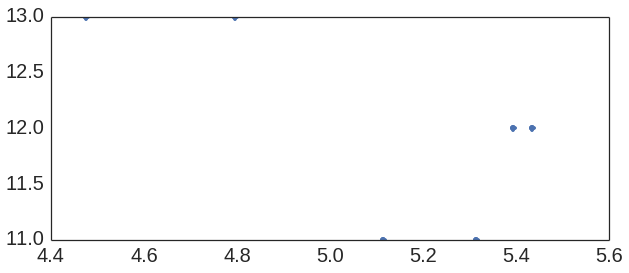

In [3]:
LP_dict = dict()
mu_count = dict()
for row in resultsLP:
    mu = row[1]
    try:
        LP_dict[mu] += [row[2]/6.+row[3]/1.5]
    except:
        LP_dict[mu] = [row[2]/6.+row[3]/1.5]
    try:
        mu_count[mu] += 1
    except:
        mu_count[mu] =0        
for mu in mu_array:
    LP_dict[mu] = np.array(LP_dict[mu])
plt.figure(figsize=(10,4))
plt.plot(mu_count.keys(), mu_count.values(), 'o')
plt.show()

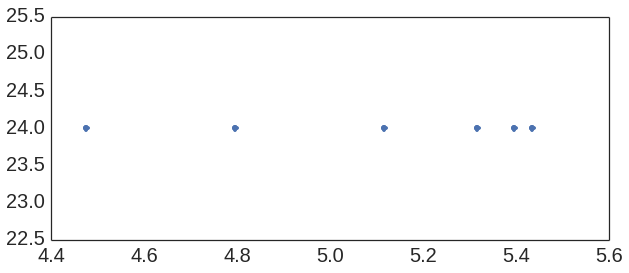

In [4]:
BP_dict = dict()
mu_count = dict()
for row in resultsBP:
    mu = row[1]
    try:
        BP_dict[mu] += [row[3:]]
    except:
        BP_dict[mu] = [row[3:]]
    try:
        mu_count[mu] += 1
    except:
        mu_count[mu] =0        
for mu in mu_array:
    BP_dict[mu] = np.array(BP_dict[mu])
plt.figure(figsize=(10,4))
plt.plot(mu_count.keys(), mu_count.values(), 'o')
plt.show()

In [5]:
color_p = sns.color_palette()

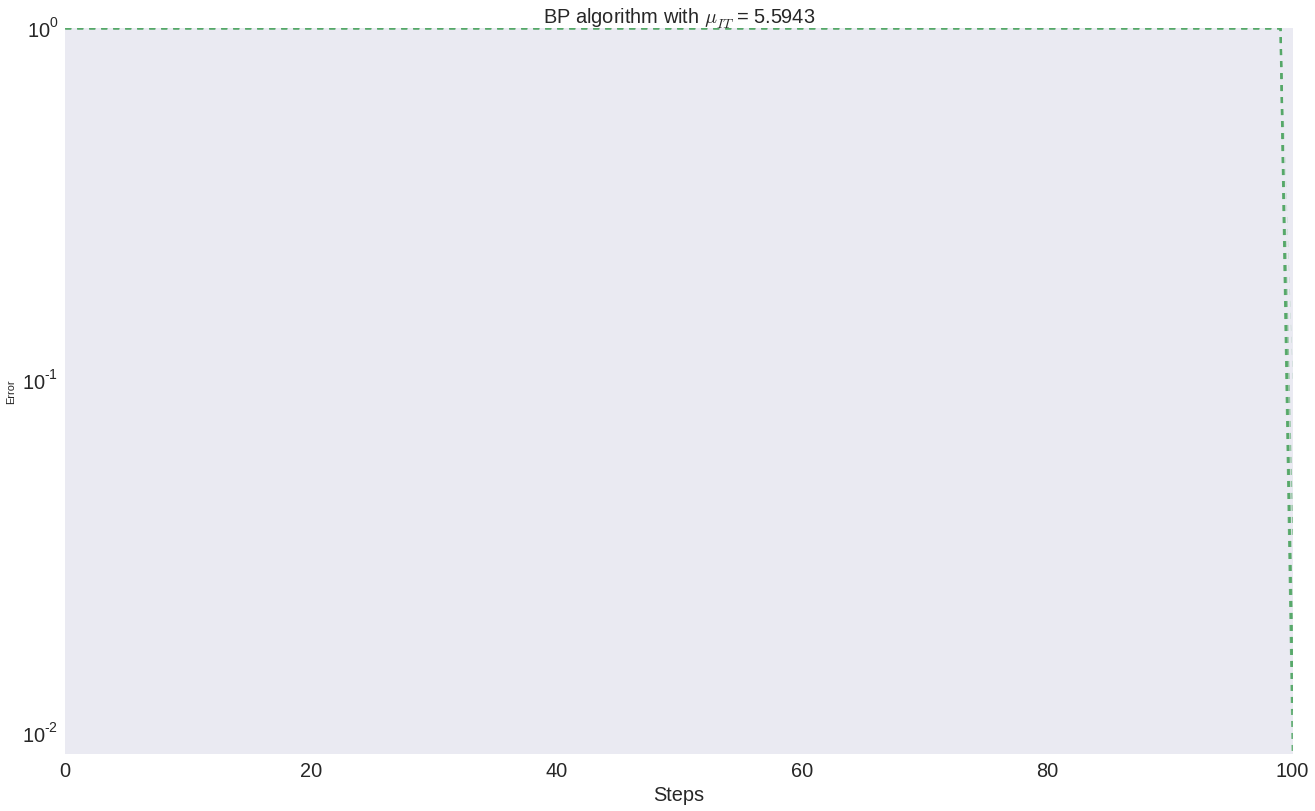

In [10]:

fig, ax = plt.subplots(figsize=(22,13))
xlim = 100
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }

x = np.arange(0,xlim+1)
for i, mu in enumerate(BP_dict.keys()):
    z = BP_dict[mu]
    y = (z==1).mean(axis=0)[:xlim+1]
    y[-1] = z.mean(axis=0)[-1]
    if mu > it_limit:
        factor = 1-(mu-it_limit)/(mu_max-it_limit)
        plt.semilogy(1.0001-y, c=color_p[0], lw=3*factor**1.5, alpha=factor)
    if mu <= it_limit:
        factor = 1-(mu-it_limit)/(mu_min-it_limit)
        plt.semilogy(1.0001-y, '--',c=color_p[1], lw=3*factor**1.5,alpha=factor)

    if abs(mu - it_limit) < 0.00001:
        print mu
        plt.fill_between(x, 1.0001-y, np.ones_like(y) , color=color_p[2], alpha=0.2, label="<IT limit")
        plt.text(8, .05, r'$\mu<$ IT limit', fontdict=font)
        plt.fill_between(x, np.ones_like(y)*0.0001, 1.0001-y, color=color_p[3], alpha=0.2, label=">IT limit")
        plt.text(8, .0005, r'$\mu>$ IT limit', fontdict=font)

plt.xlabel("Steps", fontsize=20)
plt.ylabel("Error")
plt.title("BP algorithm with $\mu_{IT}$ = "+str(float("{0:.4f}".format(it_limit))) , fontsize=20)
plt.ylim((0,1))
# plt.xlim((0,xlim))

# labels = [item.get_text() for item in ax.get_xticklabels()]
# ax.set_xticklabels(labels)
plt.show()

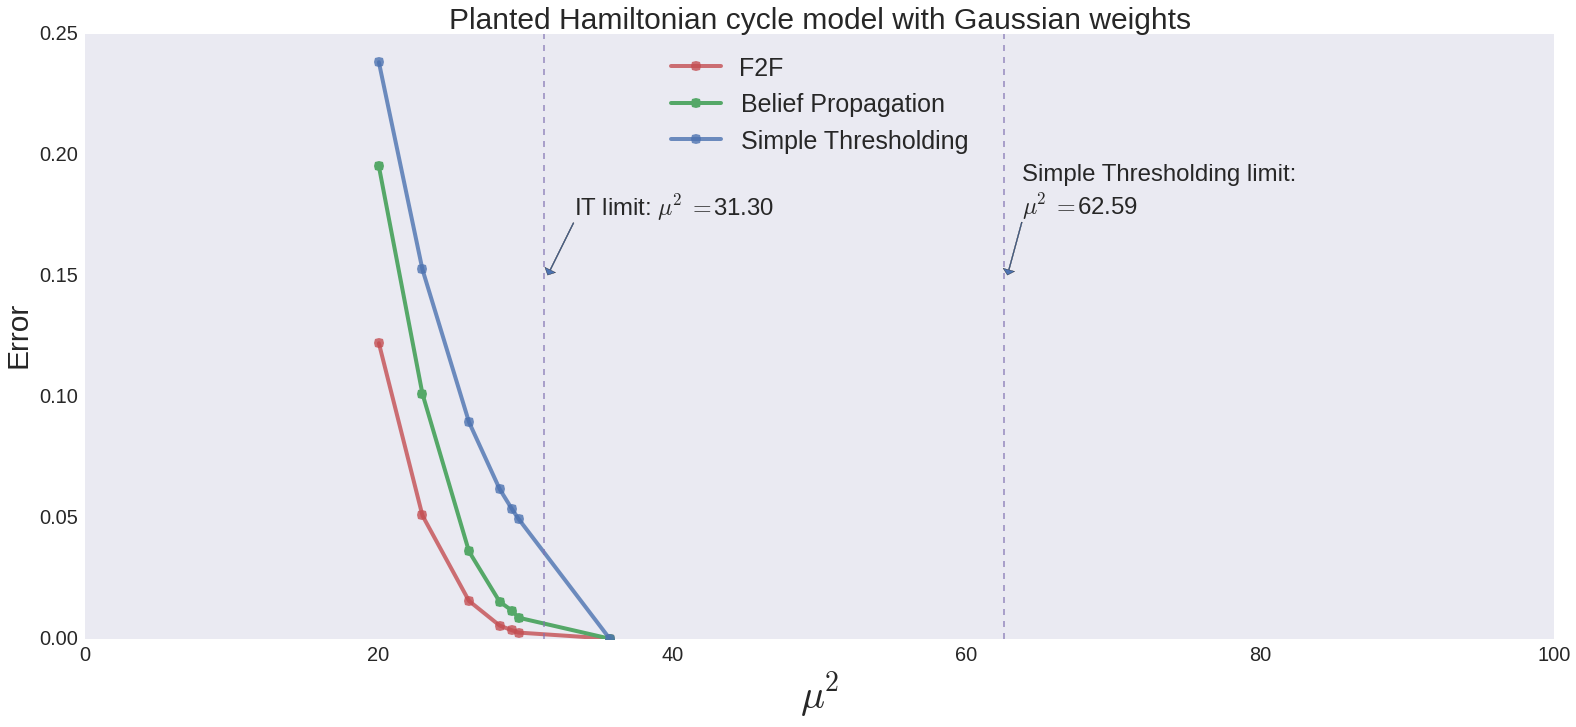

In [11]:
y_LP = []
y_BP = []
y_SG = []
mu_array = np.unique(resultsBP [:,1])
font = {'family': 'serif',
        'color':  color_p[0],
        'weight': 'normal',
        'size': 25,
        }
for mu in mu_array:
    y_LP += [LP_dict[mu].mean()]
    y_BP += [1-BP_dict[mu][:,-1].mean()]
    y_SG += [1-BP_dict[mu][:,0].mean()]
y_LP = np.array(y_LP)
y_BP = np.array(y_BP)
y_SG = np.array(y_SG)
mu_array = np.append(mu_array, [mu_array[-1]*1.1])
y_LP = np.append(y_LP, [0])
y_BP = np.append(y_BP, [0])
y_SG = np.append(y_SG, [0])
plt.figure(figsize=(22,11))
sns.set_style('dark')


plt.plot(mu_array**2, 0.00001+y_LP, '-bo', label="F2F",
         alpha=0.8, lw=4, color=color_p[2],markersize=10)
plt.plot(mu_array**2, 0.00001+y_BP, '-bo', label="Belief Propagation",
         alpha=1,   lw=4, color=color_p[1],markersize=10)
plt.plot(mu_array**2, 0.00001+y_SG, '-bo', label="Simple Thresholding", 
         alpha=0.8, lw=4, color=color_p[0],markersize=10)

plt.axvline(it_limit**2, linestyle='--', alpha=0.7, color=color_p[3])
plt.axvline(sg_limit**2, linestyle='--', alpha=0.7, color=color_p[3])

it_limit_2_pre  = "{0:.2f}".format(round(it_limit**2,2))
sg_limit_2_pre  = "{0:.2f}".format(round(sg_limit**2,2))
plt.annotate('IT limit: $\mu^2=$'+str(it_limit_2_pre), xy=(it_limit**2+0.2, .15), 
            xytext=(it_limit**2+2, .175), size=24,
            arrowprops=dict(facecolor=color_p[0], shrink=0.01, width=1),
            )
plt.annotate('Simple Thresholding limit: \n$\mu^2=$'+str(sg_limit_2_pre), xy=(sg_limit**2+0.2, .15), 
             xytext=(sg_limit**2+1.2, .175), size=24,
            arrowprops=dict(facecolor=color_p[0], shrink=0.01, width=1),
            )
plt.xlim(0,100)

plt.legend(fontsize=25, loc='upper center')
plt.xlabel("$\mu^2$", fontsize=40)
plt.ylabel("Error", fontsize=30)
plt.title("Planted Hamiltonian cycle model with Gaussian weights", fontsize=30)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [14]:
y_LP, y_BP, y_SG

(array([ 0.12207143,  0.05089524,  0.01560556,  0.00543333,  0.00342564,
         0.00251795,  0.        ]),
 array([ 0.19516032,  0.1012064 ,  0.03604064,  0.01530016,  0.0115216 ,
         0.00866656,  0.        ]),
 array([ 0.238176,  0.152584,  0.089496,  0.061856,  0.0534  ,  0.049504,
         0.      ]))

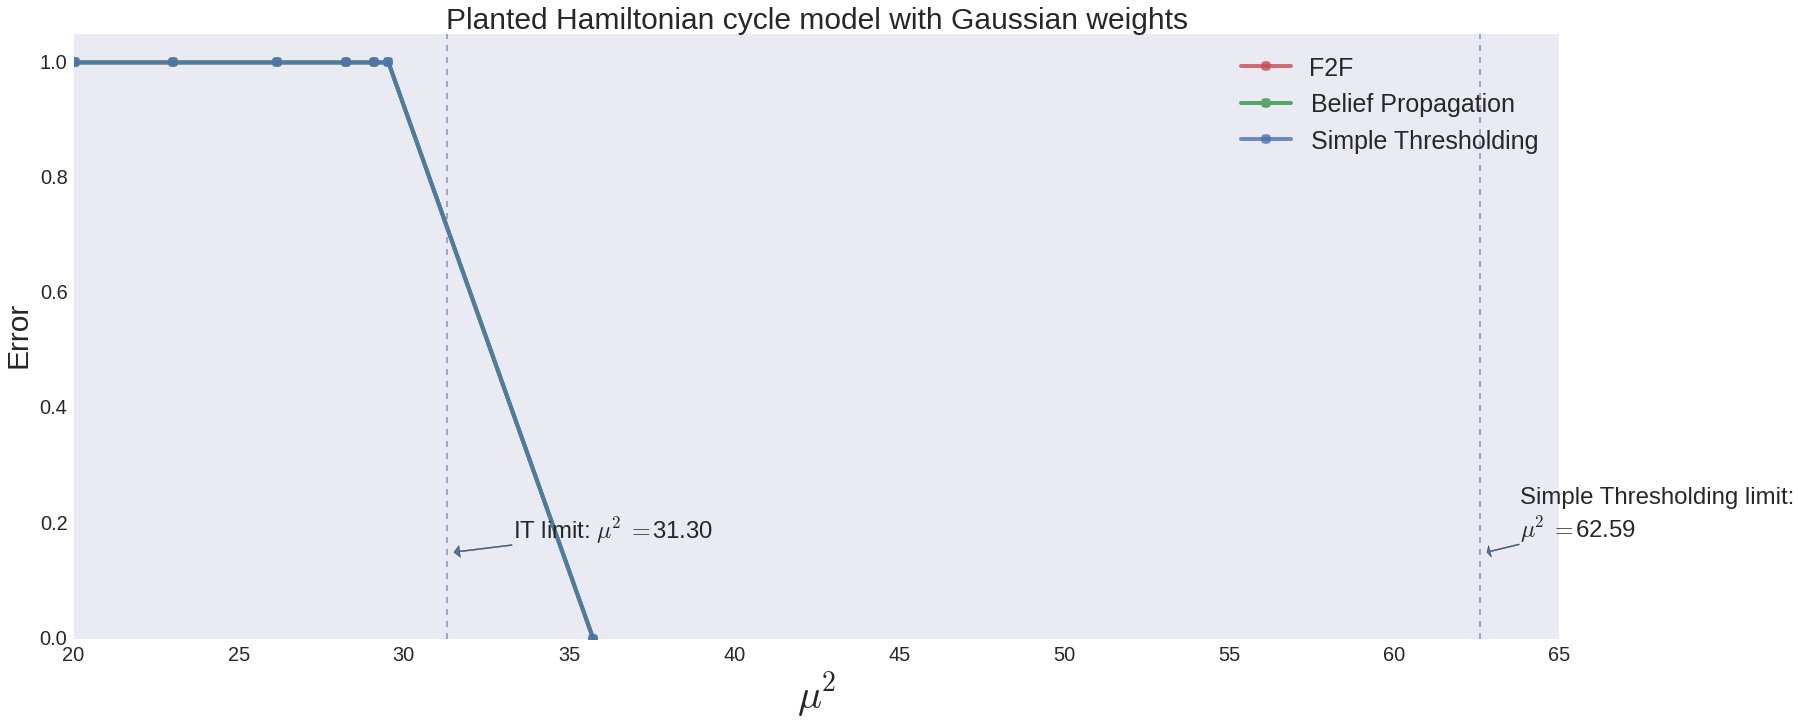

In [15]:
y_LP = []
y_BP = []
y_SG = []
mu_array = np.unique(resultsBP [:,1])
font = {'family': 'serif',
        'color':  color_p[0],
        'weight': 'normal',
        'size': 25,
        }
for mu in mu_array:
#     print LP_dict[mu==0].mean()
    y_LP += [(LP_dict[mu]!=0).mean()]
    y_BP += [(1!=BP_dict[mu][:,-1]).mean()]
    y_SG += [(1!=BP_dict[mu][:,0]).mean()]
y_LP = np.array(y_LP)
y_BP = np.array(y_BP)
y_SG = np.array(y_SG)
mu_array = np.append(mu_array, [mu_array[-1]*1.1])
y_LP = np.append(y_LP, [0])
y_BP = np.append(y_BP, [0])
y_SG = np.append(y_SG, [0])
plt.figure(figsize=(22,11))
sns.set_style('dark')


plt.plot(mu_array**2, 0.00001+y_LP, '-bo', label="F2F",
         alpha=0.8, lw=4, color=color_p[2],markersize=10)
plt.plot(mu_array**2, 0.00001+y_BP, '-bo', label="Belief Propagation",
         alpha=1,   lw=4, color=color_p[1],markersize=10)
plt.plot(mu_array**2, 0.00001+y_SG, '-bo', label="Simple Thresholding", 
         alpha=0.8, lw=4, color=color_p[0],markersize=10)

plt.axvline(it_limit**2, linestyle='--', alpha=0.7, color=color_p[3])
plt.axvline(sg_limit**2, linestyle='--', alpha=0.7, color=color_p[3])

it_limit_2_pre  = "{0:.2f}".format(round(it_limit**2,2))
sg_limit_2_pre  = "{0:.2f}".format(round(sg_limit**2,2))
plt.annotate('IT limit: $\mu^2=$'+str(it_limit_2_pre), xy=(it_limit**2+0.2, .15), 
            xytext=(it_limit**2+2, .175), size=24,
            arrowprops=dict(facecolor=color_p[0], shrink=0.01, width=1),
            )
plt.annotate('Simple Thresholding limit: \n$\mu^2=$'+str(sg_limit_2_pre), xy=(sg_limit**2+0.2, .15), 
             xytext=(sg_limit**2+1.2, .175), size=24,
            arrowprops=dict(facecolor=color_p[0], shrink=0.01, width=1),
            )

plt.legend(fontsize=25)
plt.xlabel("$\mu^2$", fontsize=40)
plt.ylabel("Error", fontsize=30)
plt.title("Planted Hamiltonian cycle model with Gaussian weights", fontsize=30)
plt.ylim(0,1.05)
# plt.xlim(0,100)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [16]:
y_LP, y_BP, y_SG

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  0.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  0.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  0.]))